## Look at the big picture
1. Aims: Classify the spam email
2. Performance measure: confusion matrix, roc curve



## Get the data

### Import the packages and the data

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
# Read the CSV file
df = pd.read_csv(
    '/Users/sean/OneDrive - connect.hku.hk/ECOM7126/Assignment/Code/Machine-Learning-7126/Dataset/SpamDataset.csv')

# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "assignment4"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Take a Quick Look at the Data Structure

In [2]:
# get a glance of the data
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000,0.897,1.157,0.0,0.127,0.000,0.000,0.127,0.257,0.127,...,0.0,0.192,0.0,0.377,0.068,0.000,2.885,87,478,1
1,0.893,0.000,0.000,0.0,0.000,0.000,0.893,0.000,0.000,0.000,...,0.0,0.000,0.0,0.557,0.000,0.000,2.811,16,59,1
2,0.000,0.549,0.549,0.0,1.099,0.549,2.189,0.000,0.000,0.549,...,0.0,0.166,0.0,0.480,0.000,0.087,15.089,151,381,1
3,0.000,0.000,0.367,0.0,1.107,0.737,0.000,2.957,0.000,2.957,...,0.0,0.146,0.0,1.093,0.000,0.000,5.157,105,287,1
4,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.274,0.0,0.140,0.000,0.000,2.756,8,25,0


In [3]:
# get the info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

In [4]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [5]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104627,0.213073,0.280670,0.065441,0.312123,0.095835,0.114285,0.105345,0.090105,0.239524,...,0.038547,0.139149,0.016949,0.269102,0.075834,0.044256,5.191111,52.183696,283.305435,0.393913
std,0.305417,1.290788,0.504258,1.395401,0.672530,0.273839,0.391530,0.401039,0.278590,0.644856,...,0.243350,0.270379,0.109342,0.815809,0.245993,0.429307,31.732934,194.909998,606.419489,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.004000,-0.004000,-0.007000,-0.008000,-0.005000,-0.004000,0.990000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.587750,6.000000,34.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064000,0.000000,0.000000,0.000000,0.000000,2.273500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.421000,0.000000,0.384000,0.000000,0.000000,0.000000,0.000000,0.161000,...,0.000000,0.188000,0.000000,0.316000,0.052000,0.000000,3.706250,43.000000,266.250000,1.000000
max,4.538000,14.289000,5.092000,42.814000,9.998000,5.889000,7.278000,11.102000,5.258000,18.171000,...,4.390000,9.742000,4.083000,32.479000,6.009000,19.829000,1102.500000,9984.000000,15840.000000,1.000000


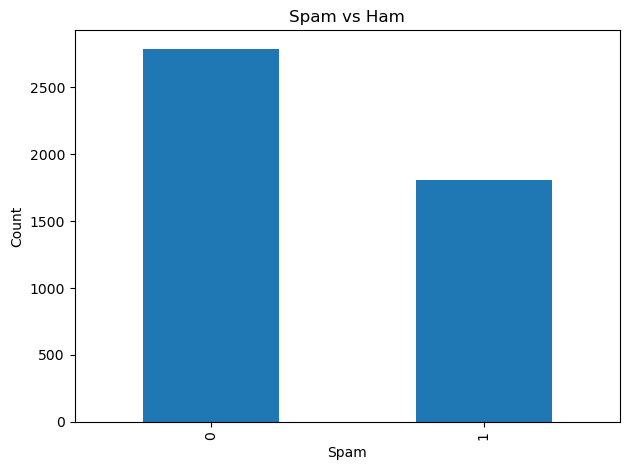

In [6]:
# plot the spam  0 = not spam; 1 = spam
df['spam'].value_counts().plot(kind='bar')
plt.title('Spam vs Ham')
plt.xlabel('Spam')
plt.ylabel('Count')
save_fig('count of spam_vs_ham')
plt.show()



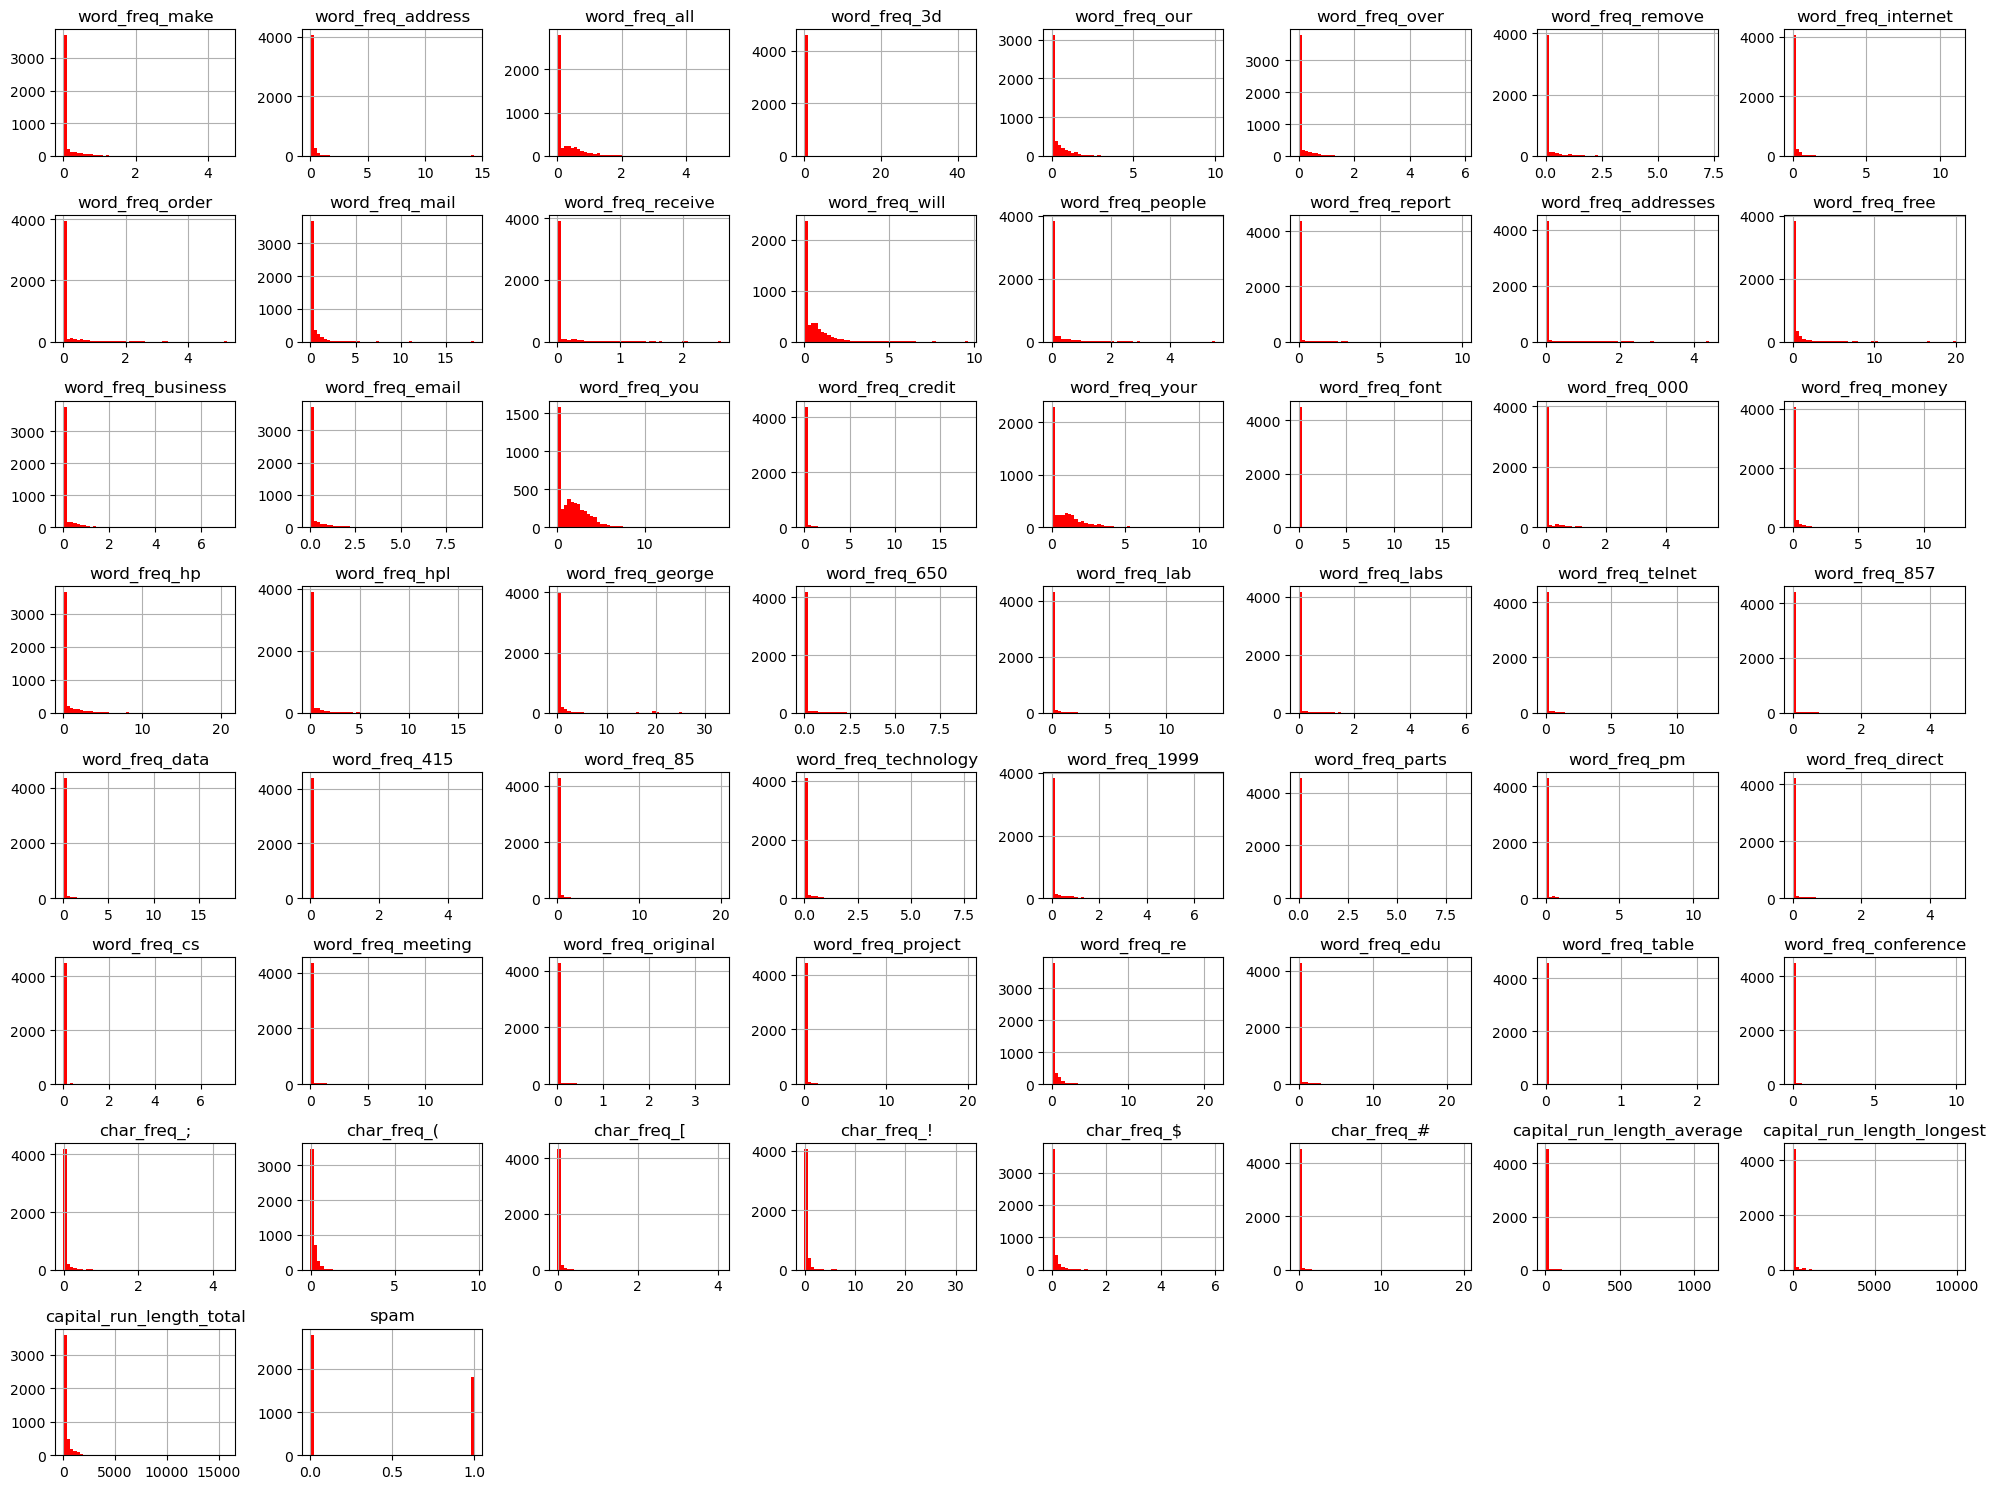

In [7]:
# using red as the color to histogram
df.hist(bins=50, figsize=(20,15), color='red')
save_fig('histogram')
plt.show()

### Create Test set

In [8]:
# split the data into training and testing
# the first 3600 rows are training data
# the rest are testing data
train_set = df.iloc[:3600, :]
test_set = df.iloc[3600:, :]
train_set.shape, test_set.shape

((3600, 58), (1000, 58))

## Discover and Visualize the Data

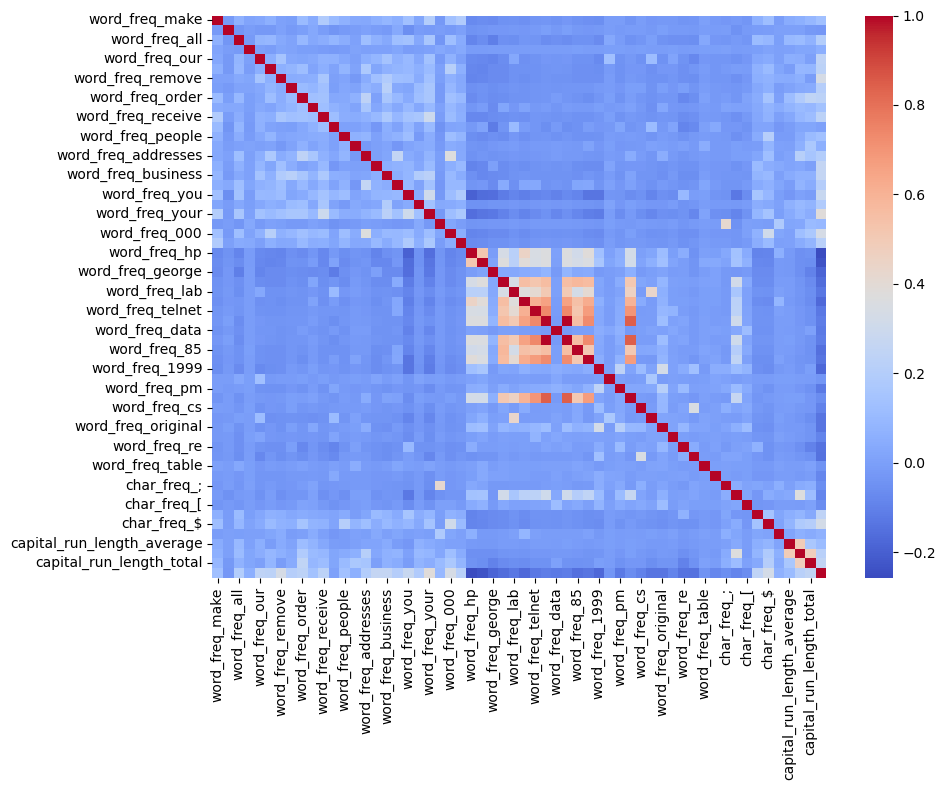

In [9]:
# correlation matrix without numbers in the middle
dfcopy=df.copy()
corr_matrix = dfcopy.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
save_fig('correlation_matrix')
plt.show()


In [10]:
# find the most correlated features
corr_matrix["spam"].sort_values(ascending=False)


spam                          1.000000
word_freq_your                0.382885
word_freq_000                 0.335028
word_freq_remove              0.332389
char_freq_$                   0.323835
word_freq_you                 0.273600
word_freq_free                0.263400
word_freq_business            0.263156
capital_run_length_total      0.249286
char_freq_!                   0.241958
word_freq_our                 0.241790
word_freq_receive             0.234127
word_freq_over                0.232571
word_freq_order               0.231882
word_freq_money               0.216349
capital_run_length_longest    0.216337
word_freq_internet            0.206978
word_freq_email               0.204158
word_freq_all                 0.197045
word_freq_addresses           0.195975
word_freq_credit              0.189778
word_freq_mail                0.139228
word_freq_people              0.133034
word_freq_make                0.126513
capital_run_length_average    0.110001
word_freq_font           

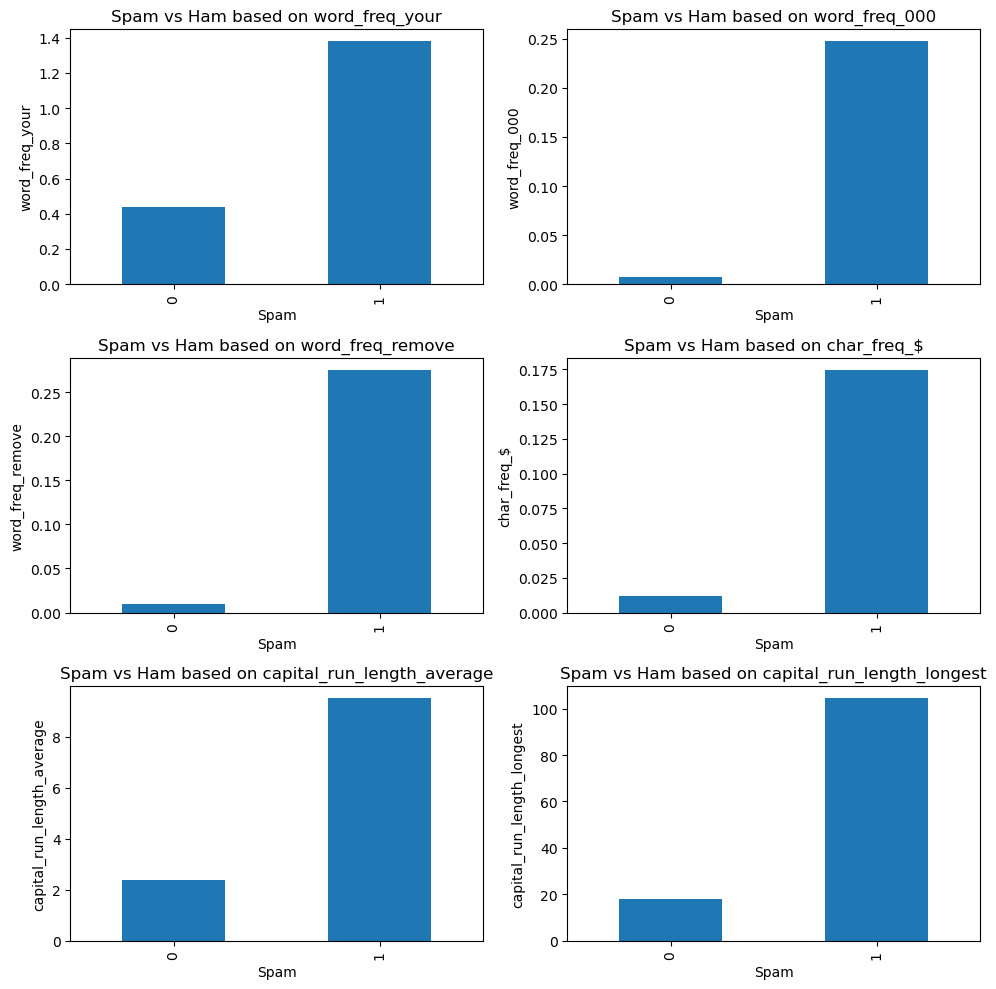

In [11]:

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
dfcopy.groupby('spam')['word_freq_your'].mean().plot(kind='bar', ax=axes[0, 0])
dfcopy.groupby('spam')['word_freq_000'].mean().plot(kind='bar', ax=axes[0, 1])
dfcopy.groupby('spam')['word_freq_remove'].mean().plot(kind='bar', ax=axes[1, 0])
dfcopy.groupby('spam')['char_freq_$'].mean().plot(kind='bar', ax=axes[1, 1])
dfcopy.groupby('spam')['capital_run_length_average'].mean().plot(kind='bar', ax=axes[2, 0])
dfcopy.groupby('spam')['capital_run_length_longest'].mean().plot(kind='bar', ax=axes[2, 1])
#title
axes[0, 0].set_title('Spam vs Ham based on word_freq_your')
axes[0, 1].set_title('Spam vs Ham based on word_freq_000')
axes[1, 0].set_title('Spam vs Ham based on word_freq_remove')
axes[1, 1].set_title('Spam vs Ham based on char_freq_$')
axes[2, 0].set_title('Spam vs Ham based on capital_run_length_average')
axes[2, 1].set_title('Spam vs Ham based on capital_run_length_longest')
#x label
axes[0, 0].set_xlabel('Spam')
axes[0, 1].set_xlabel('Spam')
axes[1, 0].set_xlabel('Spam')
axes[1, 1].set_xlabel('Spam')
axes[2, 0].set_xlabel('Spam')
axes[2, 1].set_xlabel('Spam')
#y label
axes[0, 0].set_ylabel('word_freq_your')
axes[0, 1].set_ylabel('word_freq_000')
axes[1, 0].set_ylabel('word_freq_remove')
axes[1, 1].set_ylabel('char_freq_$')
axes[2, 0].set_ylabel('capital_run_length_average')
axes[2, 1].set_ylabel('capital_run_length_longest')

save_fig('spam_vs_ham_based_on_features')
plt.show()




## Prepare the data for ML algotithms


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
preprocessing_all = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

# get the label and the features
y_train = train_set['spam']
X_train = train_set.drop("spam", axis=1)
y_test = test_set["spam"]
X_test = test_set.drop("spam", axis=1)

# preprocessing the data
X_train = preprocessing_all.fit_transform(X_train)
X_test = preprocessing_all.transform(X_test)



### Build a NN network

2023-04-03 14:49:21.957130: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/sean/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-04-03 14:49:27.343503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 57, 32)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 28, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 128)           28800     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 14, 128)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 14, 256)           229632    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 7, 256)           0

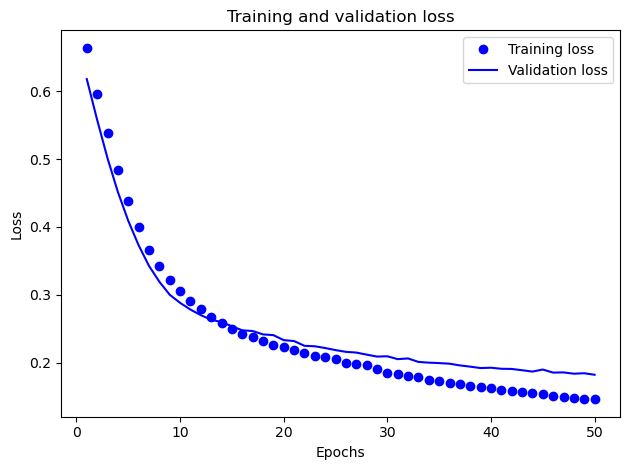

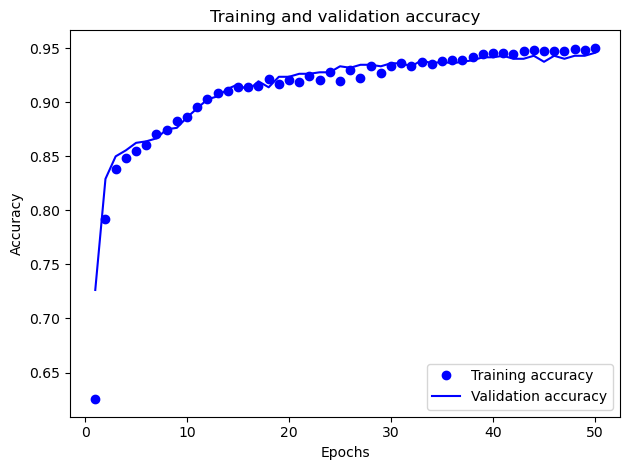

In [13]:
# build a CNN model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# define the constants
epochs = 50
batch_size = 512
validation_split = 0.2
learning_rate = 1e-4
optimizer = keras.optimizers.Adam(lr=learning_rate)

# add a dummy dimension
X_train_nn = np.expand_dims(X_train, axis=2)
X_test_nn = np.expand_dims(X_test, axis=2)


# build the model with padding
model = keras.Sequential([
    layers.Conv1D(filters=32, kernel_size=7, padding='same', activation='relu', input_shape=(57, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=128, kernel_size=7, padding='same', activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=256, kernel_size=7, padding='same', activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
# summary of the model
model.summary()

# compile the model
model.compile(loss='binary_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=8, verbose=1)
# model checkpoint
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
# reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

history = model.fit(X_train_nn, y_train, epochs=epochs, 
callbacks=[early_stopping,model_checkpoint,reduce_lr], 
validation_split=validation_split,batch_size=batch_size)
# evaluate the model
model.evaluate(X_test_nn, y_test)

# plot the loss with epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
save_fig('loss_with_epochs')
plt.show()

# plot the accuracy with epochs
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
save_fig('accuracy_with_epochs')
plt.show()


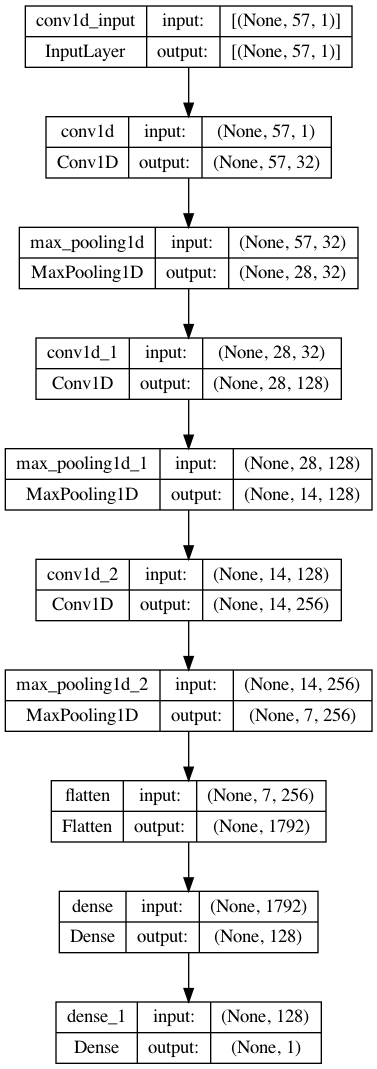

In [14]:
# visualize the model and save it
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

32/32 [==============================] - 0s 5ms/step


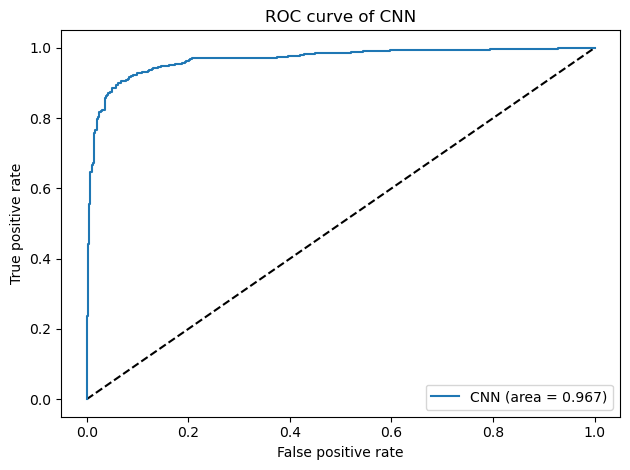

In [15]:
# show the roc curve
from sklearn.metrics import roc_curve, auc
y_pred_keras = model.predict(X_test_nn).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='CNN (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of CNN')
plt.legend(loc='best')
save_fig('roc_curve_of_cnn')
plt.show()


### Use the random forest as the classifier

In [16]:
# use the random forest to train the model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# train the model
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
# predict the model
y_pred_rf = forest_clf.predict(X_test)

#### Evaluate the model

Accuracy: 94.70%
F1 score: 93.16%
Precision score: 95.76%
Recall score: 90.70%


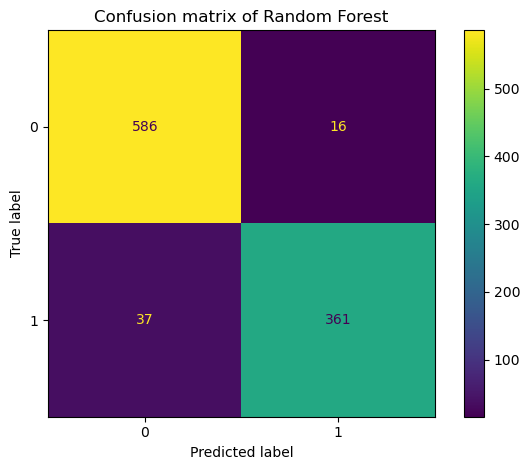

In [17]:
# show the accuracy
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
# show the f1 score
print("F1 score: {:.2f}%".format(f1_score(y_test, y_pred_rf) * 100))
# show the precision score
print("Precision score: {:.2f}%".format(precision_score(y_test, y_pred_rf) * 100))
# show the recall score
print("Recall score: {:.2f}%".format(recall_score(y_test, y_pred_rf) * 100))

# show the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_clf.classes_)
disp.plot()
# title
plt.title('Confusion matrix of Random Forest')
save_fig('confusion_matrix_of_random_forest')
plt.show()


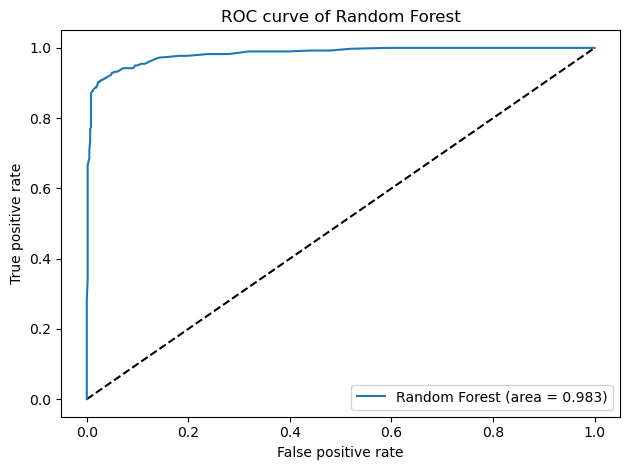

In [18]:
# show the roc curve
y_pred_proba = forest_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_rf = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of Random Forest')
plt.legend(loc='best')
save_fig('roc_curve_of_random_forest')
plt.show()


### Compare different models

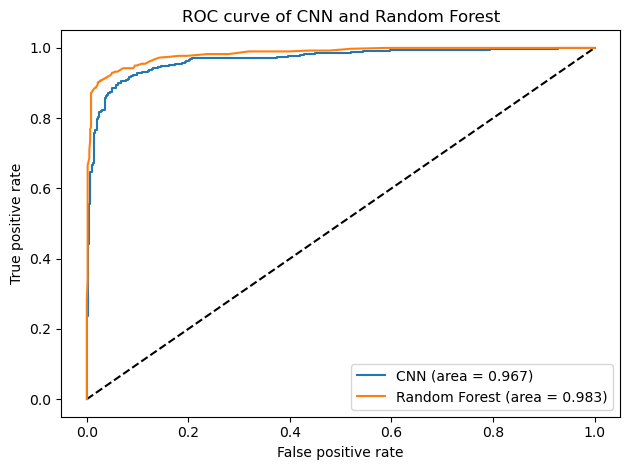

In [19]:
# compare the roc curve of random forest and cnn
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='CNN (area = {:.3f})'.format(auc_keras))
plt.plot(fpr, tpr, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of CNN and Random Forest')
plt.legend(loc='best')
save_fig('roc_curve_of_cnn_and_random_forest')
plt.show()


32/32 [==============================] - 0s 6ms/step
Accuracy score of CNN:  0.922
Accuracy score of Random Forest:  0.947


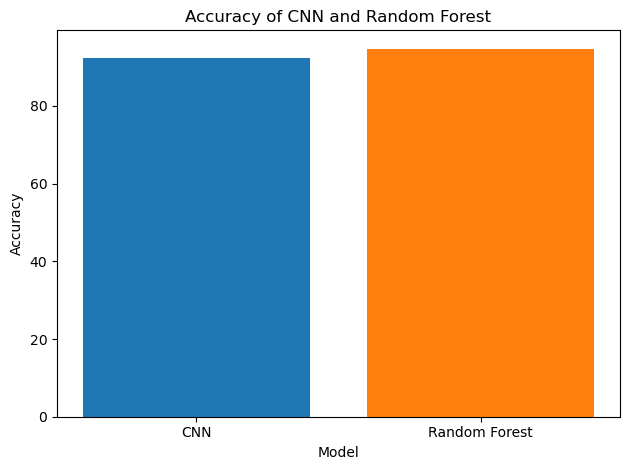

In [20]:
# compare the accuracy of random forest and cnn
# show the accuracy score 
from sklearn.metrics import accuracy_score
y_pred_nn = model.predict(X_test_nn)
y_pred_nn = (y_pred_nn > 0.5)
print("Accuracy score of CNN: ", accuracy_score(y_test, y_pred_nn))
print("Accuracy score of Random Forest: ", accuracy_score(y_test, y_pred_rf))
plt.figure(1)
plt.bar('CNN', accuracy_score(y_test, y_pred_nn) * 100)
plt.bar('Random Forest', accuracy_score(y_test, y_pred_rf) * 100)
plt.title('Accuracy of CNN and Random Forest')
plt.xlabel('Model')
plt.ylabel('Accuracy')
save_fig('accuracy_of_cnn_and_random_forest')
plt.show()
